In [2]:
from Bio import SeqIO
from Bio.SeqUtils import GC

seqGB = list(SeqIO.parse("coronavirus-genome.gb", "genbank"))

# list all seq names
nameList = [seqRec.name for seqRec in seqGB]
print(nameList)

# list all seq length
lenList = [len(seqRec.seq) for seqRec in seqGB]
print(lenList)

# list all seq length
gcList = [round(GC(seqRec.seq),1) for seqRec in seqGB]
print(gcList)

['NC_045512', 'NC_004718', 'NC_014470', 'NC_025217', 'NC_030886', 'NC_034440', 'NC_039207', 'NC_009021', 'NC_038294', 'NC_009020', 'NC_019843', 'NC_048212', 'NC_009019', 'NC_026011', 'NC_046954', 'NC_003045', 'NC_006213', 'NC_012936', 'NC_048217', 'NC_001846', 'NC_017083', 'NC_006577', 'NC_048216', 'NC_018871', 'NC_028824', 'NC_010437', 'NC_028814', 'NC_009988', 'NC_032107', 'NC_010438', 'NC_009657', 'NC_046964', 'NC_022103', 'NC_028833', 'NC_005831', 'NC_046965', 'NC_003436', 'NC_028811', 'NC_038861', 'NC_028752', 'NC_002645', 'NC_002306', 'NC_030292', 'NC_028806', 'NC_023760', 'NC_001451', 'NC_034972', 'NC_048214', 'NC_032730', 'NC_010800', 'NC_010646', 'NC_046955', 'NC_035191', 'NC_048211', 'NC_048213', 'NC_016994', 'NC_011547', 'NC_039208', 'NC_016992', 'NC_011550', 'NC_016993', 'NC_011549', 'NC_016996', 'NC_016991', 'NC_016995']
[29903, 29751, 29276, 31491, 30161, 29642, 30148, 29114, 30111, 30482, 30119, 28975, 30286, 31249, 31393, 31028, 30741, 31250, 31335, 31357, 31100, 29926,

In [3]:
# explore sequence annotation of the first genBank
seqRec0 = seqGB[0]
print(seqRec0.annotations) # all annotation
print("\n\n")
print(seqRec0.annotations['organism']) # organism name
print("\n\n")
print(seqRec0.annotations['taxonomy']) # all taxonomy
print("\n\n")
print(seqRec0.annotations['taxonomy'][7]) # 7th item of taxonomy

{'molecule_type': 'ss-RNA', 'topology': 'linear', 'data_file_division': 'VRL', 'date': '18-JUL-2020', 'accessions': ['NC_045512'], 'sequence_version': 2, 'keywords': ['RefSeq'], 'source': 'Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)', 'organism': 'Severe acute respiratory syndrome coronavirus 2', 'taxonomy': ['Viruses', 'Riboviria', 'Orthornavirae', 'Pisuviricota', 'Pisoniviricetes', 'Nidovirales', 'Cornidovirineae', 'Coronaviridae', 'Orthocoronavirinae', 'Betacoronavirus', 'Sarbecovirus'], 'references': [Reference(title='A new coronavirus associated with human respiratory disease in China', ...), Reference(title='Programmed ribosomal frameshifting in decoding the SARS-CoV genome', ...), Reference(title='The structure of a rigorously conserved RNA element within the SARS virus genome', ...), Reference(title="A phylogenetically conserved hairpin-type 3' untranslated region pseudoknot functions in coronavirus RNA replication", ...), Reference(title='Direct Submission', .

['Severe acute respiratory syndrome coronavirus 2', 'SARS coronavirus Tor2', 'Bat coronavirus BM48-31/BGR/2008', 'Bat Hp-betacoronavirus/Zhejiang2013', 'Rousettus bat coronavirus', 'Bat coronavirus', 'Betacoronavirus Erinaceus/VMC/DEU/2012', 'Rousettus bat coronavirus HKU9', 'Betacoronavirus England 1', 'Pipistrellus bat coronavirus HKU5', 'Middle East respiratory syndrome-related coronavirus', 'Bat coronavirus', 'Tylonycteris bat coronavirus HKU4', 'Betacoronavirus HKU24', 'Rodent coronavirus', 'Bovine coronavirus', 'Human coronavirus OC43', 'Rat coronavirus Parker', 'Murine hepatitis virus', 'Murine hepatitis virus', 'Rabbit coronavirus HKU14', 'Human coronavirus HKU1', 'NL63-related bat coronavirus', 'Rousettus bat coronavirus HKU10', 'BtRf-AlphaCoV/YN2012', 'Bat coronavirus 1A', 'BtRf-AlphaCoV/HuB2013', 'Rhinolophus bat coronavirus HKU2', 'NL63-related bat coronavirus', 'Miniopterus bat coronavirus HKU8', 'Scotophilus bat coronavirus 512', 'Alphacoronavirus Bat-CoV/P.kuhlii/Italy/3

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

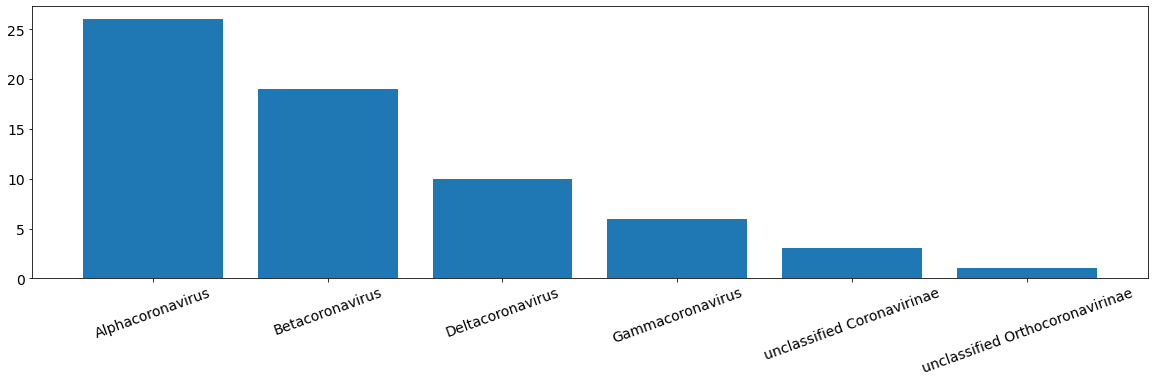

In [4]:
# look at orgnaism and taxonomy

anList = [seqRec.annotations['organism'] for seqRec in seqGB] # list organims name
print(anList)

print("\n\n")

# look at taxonomy
txInd = 9 # for Genue level, set this number to 9
txList = [seqRec.annotations['taxonomy'][txInd] for seqRec in seqGB] # list organims name
print(txList)

print("\n\n")

# non redundant set
txListNR = list(set(txList))
print(txListNR)

print("\n\n")

# count specific item in list
print(txList.count("Betacoronavirus"))

print("\n\n")

# count all items in list
txCount = {i:txList.count(i) for i in txList}
print(txCount)

#### generate bar plot
import numpy as np

key_txCount = np.array(list(txCount.keys()))
val_txCount = np.array(list(txCount.values()))

## sorting x axis
ars = np.argsort(key_txCount) # alphabetic sorting
key_txCount = key_txCount[ars]
val_txCount = val_txCount[ars]

#### sorting


# import ploting package
from matplotlib import pyplot as plt
plt.subplots(figsize=(20, 5))
plt.bar(key_txCount, val_txCount)
plt.xticks(fontsize = 14, rotation = 20)
plt.yticks(fontsize = 14)
#plt.rcParams["figure.figsize"] = (10,20) # set height and width of figure

([<matplotlib.patches.Wedge at 0x7ffeabc03580>,
 [Text(0.33991867422268784, 1.0461621742897658, 'Alphacoronavirus'),
  Text(-1.054070388007506, -0.314540326708208, 'Betacoronavirus'),
  Text(0.1325904937741384, -1.0919797438417667, 'Deltacoronavirus'),
  Text(0.857641897863112, -0.6888035823293602, 'Gammacoronavirus'),
  Text(1.0680360430118359, -0.2632470528374817, 'unclassified Coronavirinae'),
  Text(1.09871545853173, -0.05314453107715333, 'unclassified Orthocoronavirinae')])

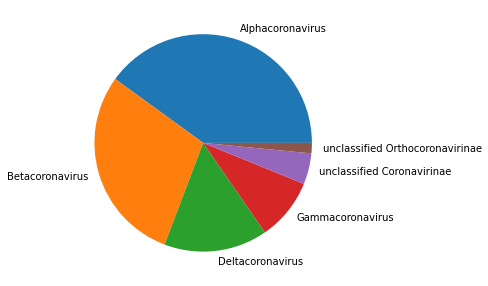

In [5]:
# pie chart
plt.subplots(figsize=(5, 5))
plt.pie(val_txCount, labels = key_txCount)

Number of sequences in taxonomic group 

Alphacoronavirus: n = 26
Betacoronavirus: n = 19
Deltacoronavirus: n = 10
Gammacoronavirus: n = 6
unclassified Coronavirinae: n = 3
unclassified Orthocoronavirinae: n = 1



Average %GC in taxonomic group 
 
Alphacoronavirus: %GC = 38.8
Betacoronavirus: %GC = 39.8
Deltacoronavirus: %GC = 40.6
Gammacoronavirus: %GC = 38.5
unclassified Coronavirinae: %GC = 40.2
unclassified Orthocoronavirinae: %GC = 36.6



%GC of all sequence in each taxonomic group
[array([42.8, 38.5, 37.8, 38.1, 38.3, 39.3, 39.2, 41.8, 40.1, 40.4, 40.8,
       41.8, 34.5, 42. , 41. , 37.6, 38.4, 38.3, 38.1, 39. , 38.1, 37.5,
       40.1, 40.2, 32. , 32. ]), array([38. , 40.8, 40.4, 41.3, 45.3, 37.5, 41. , 41.2, 43.2, 41.2, 37.8,
       40.1, 37.1, 36.8, 41.3, 41.8, 41.8, 37.6, 32.1]), array([38.1, 38.7, 43.2, 44.6, 42.5, 46.7, 38. , 35.1, 39.8, 39.4]), array([38.4, 37.9, 39.3, 38.3, 39.2, 38. ]), array([41.2, 41.4, 38. ]), array([36.6])]





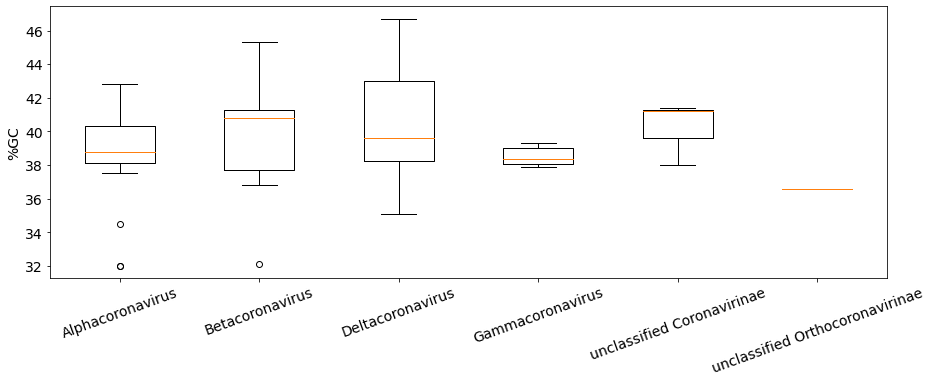

In [6]:
# get statistic for each taxonomic group

txArray = np.array(txList)
gcArray = np.array(gcList)

# count
print("Number of sequences in taxonomic group \n")
for txName in key_txCount:
    print(txName + ": " + "n = " + str(sum(txArray == txName)))
    
print("\n\n")



# %GC average for each taxonomic group
print("Average %GC in taxonomic group \n ")
for txName in key_txCount:
    print(txName + ": " + "%GC = " + str(round(np.mean(gcArray[txArray == txName]), 1)))
    
print("\n\n")


# %GC for each sequence for each taxonomic group
GCdata = {}
print("%GC of all sequence in each taxonomic group")
for txName in key_txCount:
    GCdata[txName] = gcArray[txArray == txName]
    
print(list(GCdata.values()))
plt.subplots(figsize=(15, 5))
plt.boxplot(list(GCdata.values()))
plt.xticks(list(range(1,len(GCdata.keys())+1)), GCdata.keys(), fontsize = 14, rotation = 20)
plt.yticks(fontsize = 14)
plt.ylabel("%GC", fontsize = 14)

#box https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

print("\n\n")

Text(0, 0.5, '%GC')

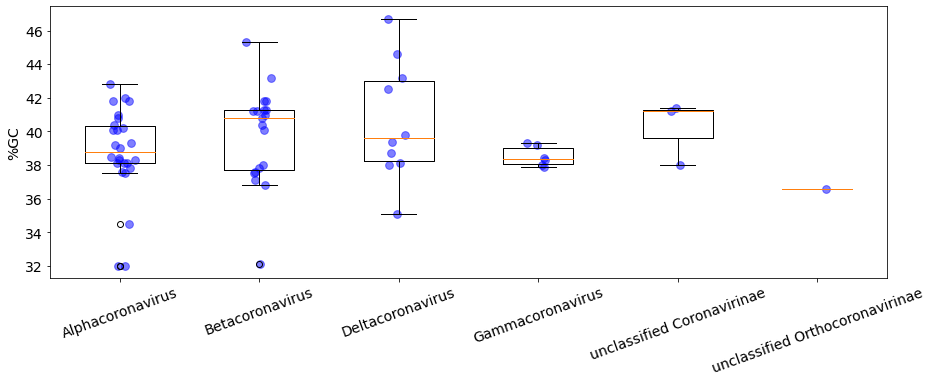

In [7]:
## scatter plot of GC content 
cnt = 1
plt.subplots(figsize=(15, 5))
for txName in key_txCount:
    GCtxName = GCdata[txName]
    pos = np.ones(len(GCtxName))*cnt + np.random.normal(0,0.04, size = len(GCtxName))
    plt.scatter(pos, GCtxName, color = 'b', s = 60, alpha = 0.5)
    cnt = cnt + 1
plt.boxplot(list(GCdata.values())) # optional
plt.xticks(list(range(1,len(GCdata.keys())+1)), GCdata.keys(), fontsize = 14, rotation = 20)
plt.yticks(fontsize = 14)
plt.ylabel("%GC", fontsize = 14)

In [8]:
# explore sequence annotation of the first genBank
seqRec0 = seqGB[0]
print(seqRec0.features) # all annotation

print("\n\n")

print(seqRec0.features[1])

print("\n\n")


#print(seqRec0.features[0])

print(len(seqRec0.features))

print("\n\n")

# get all types in feature list
seqRec0sFtype = [sF.type for sF in seqRec0.features]
seqRec0sFlocStart = [sF.location.start for sF in seqRec0.features]
seqRec0sFlocEnd = [sF.location.end for sF in seqRec0.features]
seqRec0sFlocStrand = [sF.location.strand for sF in seqRec0.features]

print(seqRec0sFtype)
print("\n")
print(seqRec0sFlocStart)
print("\n")
print(seqRec0sFlocEnd)
print("\n")
print(seqRec0sFlocStrand)

print("\n\n")

for i in range(0,len(seqRec0sFtype)):
    print(str(i) + ": "+ str(seqRec0sFtype[i]) + ", " + str(seqRec0sFlocStart[i]) + ", " + str(seqRec0sFlocEnd[i]) + ", " + str(seqRec0sFlocStrand[i]))

## list all seq names
#nameList = [seqRec.name for seqRec in seqGB]
#print(nameList)


[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(29903), strand=1), type='source'), SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(265), strand=1), type="5'UTR"), SeqFeature(FeatureLocation(ExactPosition(265), ExactPosition(21555), strand=1), type='gene'), SeqFeature(CompoundLocation([FeatureLocation(ExactPosition(265), ExactPosition(13468), strand=1), FeatureLocation(ExactPosition(13467), ExactPosition(21555), strand=1)], 'join'), type='CDS', location_operator='join'), SeqFeature(FeatureLocation(ExactPosition(265), ExactPosition(805), strand=1), type='mat_peptide'), SeqFeature(FeatureLocation(ExactPosition(805), ExactPosition(2719), strand=1), type='mat_peptide'), SeqFeature(FeatureLocation(ExactPosition(2719), ExactPosition(8554), strand=1), type='mat_peptide'), SeqFeature(FeatureLocation(ExactPosition(8554), ExactPosition(10054), strand=1), type='mat_peptide'), SeqFeature(FeatureLocation(ExactPosition(10054), ExactPosition(10972), strand=1), type='mat_peptide'

In [9]:
# length of all CDS in a genome
seqRec0sFCDSlen = [sF.location.end - sF.location.start for sF in seqRec0.features if sF.type == "CDS"]
print(seqRec0sFCDSlen)

[21290, 13218, 3822, 828, 228, 669, 186, 366, 132, 366, 1260, 117]


[21221, 13149, 3768, 825, 465, 231, 666, 192, 369, 135, 120, 255, 1269, 297, 213]


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

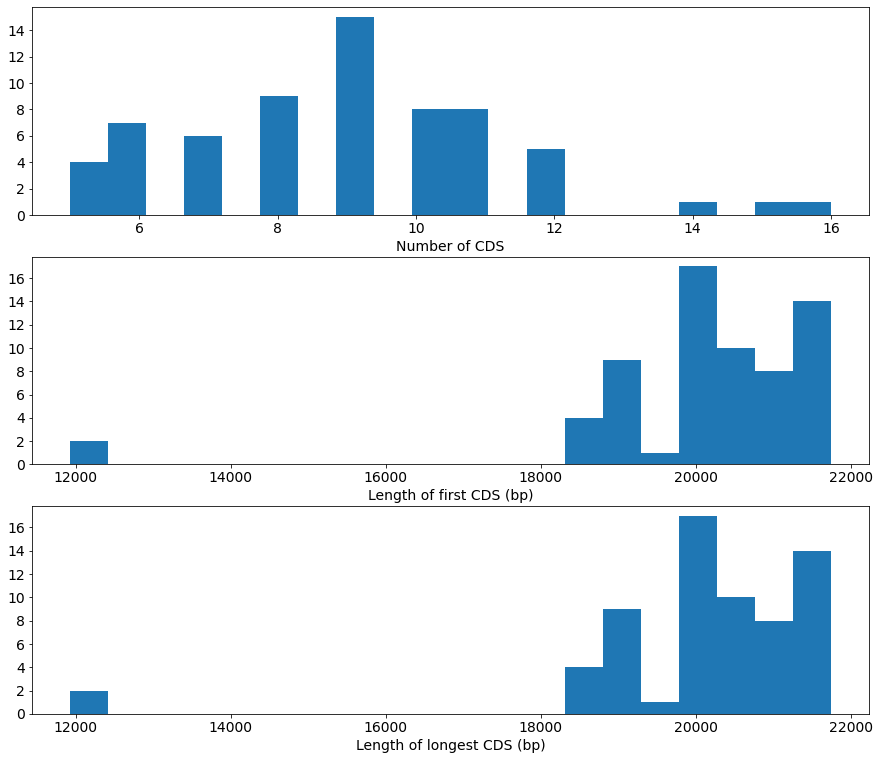

In [10]:
# length of all CDS in all genomes
cdsLenList = [[sF.location.end - sF.location.start for sF in seqRec.features if sF.type == "CDS"] for seqRec in seqGB]
print(cdsLenList[1])

# number of CDS in all genome
numCDS = [len(cdsLen) for cdsLen in cdsLenList]
# length of first CDS in all genome
lenCDS1 = [cdsLen[0] for cdsLen in cdsLenList]
# length of longest CDS in all genome
lenCDSmax = [max(cdsLen) for cdsLen in cdsLenList]

n_bin = 20 # number of bins

plt.subplots(figsize=(15, 13))
plt.subplot(311)
plt.hist(numCDS, n_bin)
plt.xlabel("Number of CDS", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(312)
plt.hist(lenCDS1, n_bin)
plt.xlabel("Length of first CDS (bp)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(313)
plt.hist(lenCDSmax, n_bin)
plt.xlabel("Length of longest CDS (bp)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)










# length of all CDS in all genome

In [38]:
# explore sequence annotation of the first genBank
seqRec0 = seqGB[0]
print(seqRec0.id)
print("\n")
print(seqRec0.features[2]) # all annotation
print("\n")
print(seqRec0.features[2].qualifiers["gene"]) # all annotation


NC_045512.2


type: gene
location: [265:21555](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:43740578']
    Key: gene, Value: ['ORF1ab']
    Key: locus_tag, Value: ['GU280_gp01']



['ORF1ab']


In [49]:
seqRec0 = seqGB[1]
sFtype0 = [sF.type for sF in seqRec0.features]
print(sFtype0)

### ** use d.get('key') to return 'none' when the key does not exist d['key'] will give error in this case
print("\n\n")
sFgeneName = [sF.qualifiers.get('gene') for sF in seqRec0.features if sF.type == 'gene']
print(str(sFgeneName))

print("\n\n")

# print out all annotated gene name in order for each genome
for seqRec in seqGB:
    sFgeneName_i = [sF.qualifiers.get('gene', 'unknown') for sF in seqRec.features if sF.type == 'gene']
    print(str(seqRec.id) + ": " + str(sFgeneName_i))
    #print("\n")

['source', "5'UTR", 'gene', 'CDS', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'CDS', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'mat_peptide', 'gene', 'CDS', 'gene', 'CDS', 'gene', 'CDS', 'gene', 'CDS', 'gene', 'CDS', 'gene', 'CDS', 'gene', 'CDS', 'gene', 'CDS', 'gene', 'CDS', 'gene', 'CDS', 'gene', 'CDS', 'gene', 'CDS', 'CDS', "3'UTR"]



[['ORF1ab'], ['S'], ['ORF3a'], ['ORF3b'], ['E'], ['M'], ['ORF6'], ['ORF7a'], ['ORF7b'], ['ORF8a'], ['ORF8b'], ['N'], None]



NC_045512.2: [['ORF1ab'], ['S'], ['ORF3a'], ['E'], ['M'], ['ORF6'], ['ORF7a'], ['ORF7b'], ['ORF8'], ['N'], ['ORF10']]
NC_004718.3: [['ORF1ab'], ['S'], ['ORF3a'], ['ORF3b'], ['E'], ['M'], ['ORF6'], ['ORF7a'], ['ORF7b'], ['ORF8a'], ['ORF8b'], ['

In [12]:
list(range(1,5))

[1, 2, 3, 4]

In [19]:
len(GCdata.keys())
np.random.normal(0,1, size = 5)

array([-0.17548304, -1.82307461,  0.37452932,  0.9170064 ,  0.83991169])

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")
type(tips)

pandas.core.frame.DataFrame